# <span style = "color: green" >Simple Linear Regression Project (Gold Price Prediction) </span>

***

Of all the precious metals, gold is the most popular as an investment. Investors generally buy gold as a way of diversifying risk, especially through the use of futures contracts and derivatives. The gold market is subject to speculation and volatility as are other markets. Compared to other precious metals used for investment, gold has been the most effective safe haven across a number of countries.<br><br>
The Dataset contain gold prices (in USD) from 2001 to 2019.
Our goal is to predict where the gold prices will be in the coming years

#### Import the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns

#### Read 'gold_price_usd.csv' & store it in a variable

In [2]:
df = pd.read_csv('gold_price_usd.csv')

#### View the first 5 rows

In [3]:
df.head()

,Date,USD (AM)
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60


#### Check the information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4718 non-null   object 
 1   USD (AM)  4718 non-null   float64
dtypes: float64(1), object(1)
memory usage: 73.8+ KB


#### Find the columns

In [5]:
df.columns

Index(['Date', 'USD (AM)'], dtype='object')

#### Rename USD (AM) to Price

In [6]:
df.rename(columns={'USD (AM)':'Price'},inplace= True)

In [7]:
def year(a):
    a =a.split('-')[0]
    return a

In [8]:
df['Year']=df['Date'].apply(year)

In [9]:
def month(b):
    b =b.split('-')[1]
    return b

In [10]:
df['Months'] = df['Date'].apply(month)

In [11]:
df.head()

,Date,Price,Year,Months
0,2001-01-02,272.80,2001,01
1,2001-01-03,269.00,2001,01
2,2001-01-04,268.75,2001,01
3,2001-01-05,268.00,2001,01
4,2001-01-08,268.60,2001,01


#### Check if there are any missing values in the dataset

In [12]:
df.isna().sum()

Date      0
Price     0
Year      0
Months    0
dtype: int64

#### Gather the basic statistical information about the dataset

In [13]:
df.describe()

,Price
count,4718.000000
mean,959.990812
std,449.456217
min,256.700000
25%,449.112500
50%,1113.125000
75%,1293.750000
max,1896.500000


#### Convert Date column from object to datetime format

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4718 non-null   datetime64[ns]
 1   Price   4718 non-null   float64       
 2   Year    4718 non-null   object        
 3   Months  4718 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 147.6+ KB


In [16]:
df['Year'] = pd.to_numeric(df['Year'])

In [17]:
df['Months'] = pd.to_numeric(df['Months'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4718 non-null   datetime64[ns]
 1   Price   4718 non-null   float64       
 2   Year    4718 non-null   int64         
 3   Months  4718 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 147.6 KB


#### Create a new column with Year

In [19]:
df['Year']= df['Year']

In [20]:
df.head()

,Date,Price,Year,Months
0,2001-01-02,272.80,2001,1
1,2001-01-03,269.00,2001,1
2,2001-01-04,268.75,2001,1
3,2001-01-05,268.00,2001,1
4,2001-01-08,268.60,2001,1


#### Create a new column with Months

In [21]:
df['Months'] = df['Months']

In [22]:
df.head()

,Date,Price,Year,Months
0,2001-01-02,272.80,2001,1
1,2001-01-03,269.00,2001,1
2,2001-01-04,268.75,2001,1
3,2001-01-05,268.00,2001,1
4,2001-01-08,268.60,2001,1


#### See all the years and Months in our dataset

In [23]:
df['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [24]:
df['Months'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

## <span style = "color: orange" >Visualization</span>

### Create a regression plot with x-axis as years and y-axis as Price

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Year', ylabel='Price'>

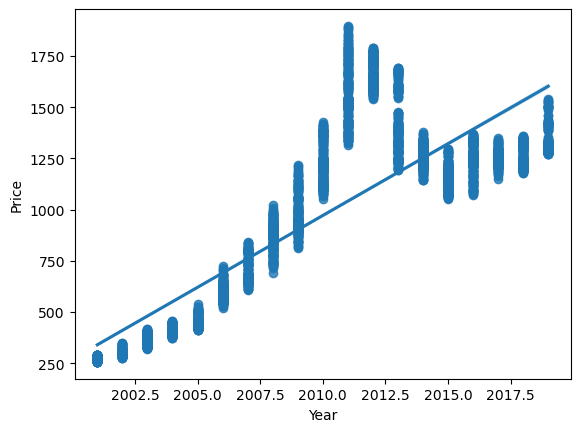

In [26]:
sns.regplot(x = 'Year', y = 'Price', data = df)

### Plot a histplot to find the variation in price

C:\Users\Aishw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

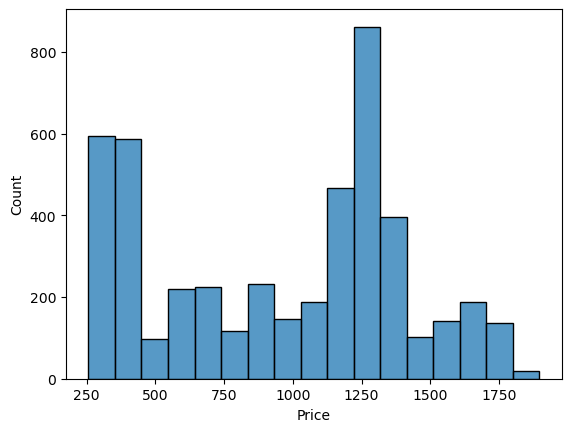

In [27]:
sns.histplot(df['Price'])

### Assign year and price in x and y variables

In [28]:
X = df[['Year']]
y = df['Price']

### Split the data into traning and testin set

We will train our model on the training set and then use the test set to evaluate the model

In [29]:
# import train_test split
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=100)

In [31]:
X_train.head()

,Year
683,2003
2119,2009
4615,2019
662,2003
4159,2017


In [32]:
X_test.head()

,Year
962,2004
403,2002
3220,2013
1588,2007
2065,2009


In [33]:
y_test.head()

962      425.50
403      307.80
3220    1335.75
1588     687.25
2065     924.75
Name: Price, dtype: float64

In [34]:
y_train.head()

683      374.9
2119     940.0
4615    1291.6
662      363.3
4159    1251.1
Name: Price, dtype: float64

## Train Data

In [35]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

### Create Linear Regression Model

In [36]:
model = LinearRegression()

### Train the  model

In [37]:
model.fit(X_train,y_train)

LinearRegression()

### Check the score of our model

In [38]:
model.score(X_train,y_train)

0.7048691960222999

### Check the coefficient and Intercept

In [39]:
model.coef_

array([70.17366927])

In [40]:
model.intercept_

-140074.3237477936

### Make Prediction with Test data

In [41]:
Prediction = model.predict(X_test)

In [42]:
Prediction

array([ 553.70946788,  413.36212934, 1185.27249131, ..., 1115.09882204,
        343.18846007, 1536.14083765])

### Create a new dataframe with actual and predicted values with year(X_test) as index

In [43]:
ab = pd.DataFrame({'y_test':y_test,'Prediction':Prediction})

In [47]:
ab = ab.set_index(X_test['Year'])

In [48]:
ab

,y_test,Prediction
Year,,
2004,425.50,553.709468
2002,307.80,413.362129
2013,1335.75,1185.272491
2007,687.25,764.230476
2009,924.75,904.577814
...,...,...
2009,1088.00,904.577814
2013,1250.75,1185.272491
2012,1776.50,1115.098822


### Check the mean absolute error, mean square error

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [50]:
mean_squared_error(y_test,Prediction)

58032.97376893202

In [51]:
mean_absolute_error(y_test,Prediction)

186.24273893873823

### Predict the prices for the following years
   * 2025, 2026, 2027, 2028, 2030

In [52]:
new = pd.DataFrame({'Year':[2025,2026,2027,2028,2030]})

In [53]:
fprice = model.predict(new)

In [54]:
fprice

array([2027.35652254, 2097.53019181, 2167.70386108, 2237.87753035,
       2378.22486888])

In [55]:
new['Price']= fprice

In [56]:
new.set_index('Year', inplace = True)

In [57]:
new

,Price
Year,
2025,2027.356523
2026,2097.530192
2027,2167.703861
2028,2237.877530
2030,2378.224869
